# **Classification of Movies**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/competitions/movies/data*

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Movie/kaggle_movie_train.csv')

# **Exploring the dataset**

In [4]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df.shape

(22579, 3)

In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [7]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

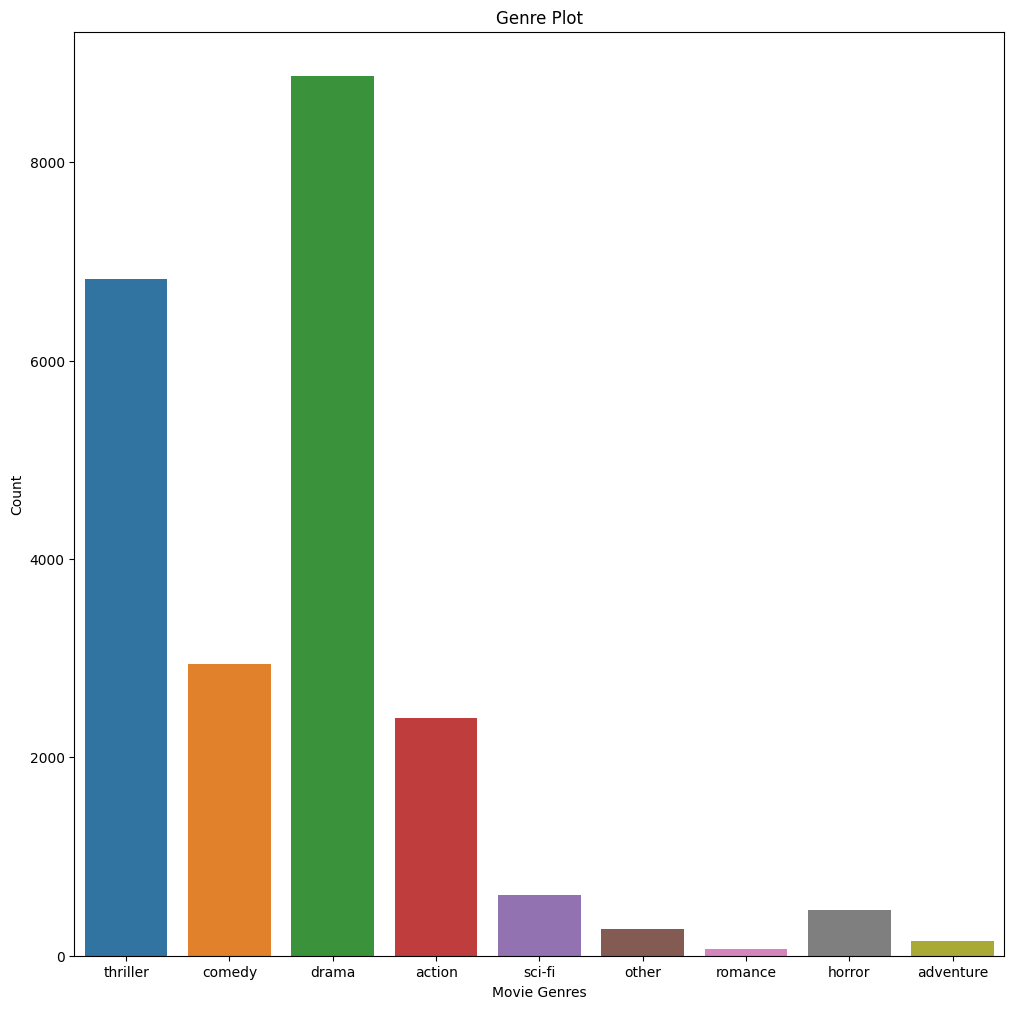

In [8]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [9]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [10]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [11]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [13]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df.shape

(22579, 2)

In [15]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [17]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [18]:
len(corpus)

22579

In [19]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 20):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

In [20]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [21]:
y = df['genre'].values

# **Model Building**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [25]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [27]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

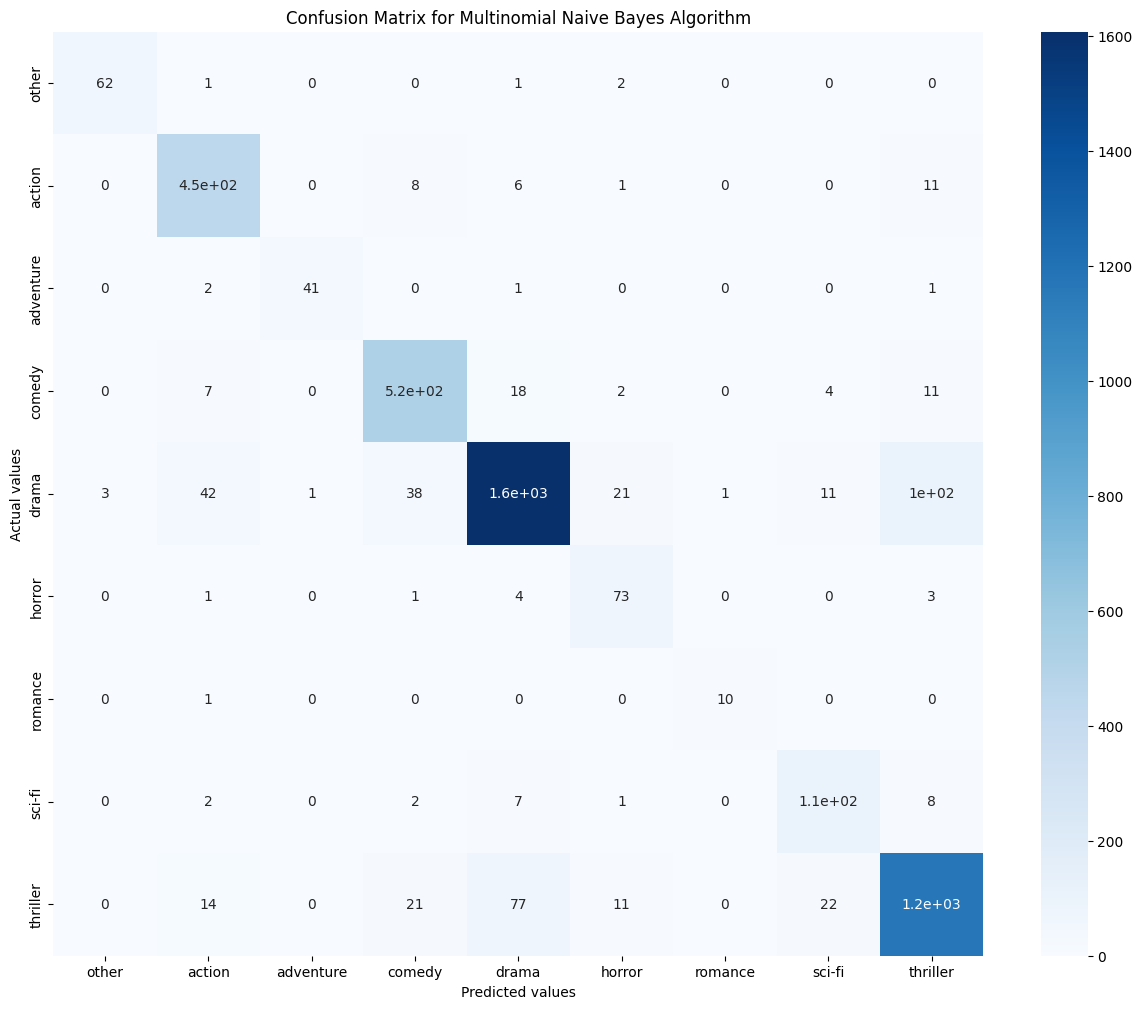

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [29]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [30]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [31]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [32]:
# For generating random integer
from random import randint

In [33]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Movie/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [34]:
test.shape

(5589, 2)

In [35]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [36]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e you doing? STAGE MANAGER We'll get you into hair and make up after this, just put this on... The other actors take their positions. Lyla watches from behind the cameras as David readies himself. Chloe enters the set with Kleenex tucked into the neck of her costume. CHLOE to Betty Hi. I hear you're great. Good luck... BETTY What are you doing here? David... GEORGE Your lines are in the script, but you can ad lib. BETTY Ad lib? GEORGE In fact, I want you to ad lib, that's the magic I'm after. I wanna give a whole new feel to the show. She's sliding toward a complete meltdown. VOICE Slate it! George steps back behind the cameras. Betty's still frozen to her spot, overwhelmed. GEORGE Just do what you've been doing. Watch the scene and on your cue take off from there. VOICE 5 4 3 2... Chloe and Blake run through their lines lifelessly, then stop when they get to Betty's cue. Their faces loom around her menacingly. Staring. The lights are impossibly bright. People begin to shuffle 

In [37]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: PER I know. Francis looks the Skipper over, reading him, smiling. SKIPPER You're a day late. We keep a schedule aboard ship. Lives depend on it. to Philip Hello, Philip. PHIL Sir. Skipper's directness bugs Francis. FRANCIS Your cable said you wouldn't be putting out until mid October. SKIPPER As you can see, there's a lot to do. FRANCIS Indentured servitude is not what my son had in mind. SKIPPER This is a working ship. Promptness is not a luxury, it's a necessity, as is the work to maintain her. Had we been ready, I can assure you we would have sailed. Something in this exchange turns the tone of conversation. FRANCIS And I would have expected compensation for my time and expense coming all the way down here. SKIPPER Happily, it all worked out... This time. to Bill Bill, take Philip below and help him find a bunk. Phil follows Bill down the companionway. FRANCIS I'll be frank with you. This was his mother's idea. A romp through the Caribbean on a sailboat sounds more like a va

In [38]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: d hands him the BROWN ENVELOPE. NATALIE I wrote an address in there, too. Might be useful. It's this abandoned place outside of town. I guy I know used to use it for his bigger deals. LEONARD Deals? NATALIE It's isolated. LEONARD Sounds perfect? What do I owe you? NATALIE I wasn't helping you for money. LEONARD Sorry. CONTINUED 21. 26 CONTINUED 26 NATALIE It's not your fault. See, you have this condition... Leonard smiles. Natalie reaches into her purse and pulls out a MOTEL ROOM KEY. NATALIE cont'd Are you still at the Discount Inn? Room 304? You left this at my place. Leonard pulls out a Polaroid of the Discount Inn. LEONARD The Discount Inn, yeah. Natalie leaves the key and gets up from the table. NATALIE They treating you alright? LEONARD smiling Don't remember. NATALIE You know what we have in common? Leonard shrugs. NATALIE cont'd We're both survivors. Take care, Leonard. Leonard watches Natalie leave. He sits at the table, looking down at the BROWN ENVELOPE and the MOTEL

In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: er's seat and tries to tug at the controls. They are frozen. In desperation Lucy yanks on the steering wheel. The bulldozer turns ninety degrees into the gas station. EXT. GAS STATION. NIGHT A TOURIST is filling his station wagon at one of the self service pumps. His WIFE is bringing their TODDLER back from the rest rooms. The bulldozer suddenly smashes into the gas pumps and through the gas station. The tourist dives out of its path. The bulldozer circles behind the gas station toward a small motel next door, leaving in its wake a totaled station wagon, and gasoline leaking on the ground from the smashed pumps. EXT. HAMBURGER RESTAURANT. NIGHT Linda watches with mounting horror. And yet she remembers the warning from Alura, and stands frozen, unable to intervene. EXT. MOTEL GAS STATION. NIGHT Lucy fights the wheel in vain. The bulldozer circles through the motel, smashing the individual cabins into matchsticks. The bulldozer drives under the MOTEL SIGN which HITS LUCY ON THE H

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  want them chains knocked off. THE HOGWALLOP KITCHEN The four men and little boy sit around the kitchen table eating stew. A Sears Roebuck catalogue on the boy's chair brings him to table height. The cons are now rid of their chains and are dressed in ill fitting farmer's wear. WASH They foreclosed on Cousin Vester. He hanged himself a year come May. PETE And Uncle Ratliff? WASH The anthrax took most of his cows. The rest don't milk, and he lost a boy to mumps. PETE Where's Cora, Cousin Wash? Wash glances at the little boy. WASH Couldn't say. Mrs. Hogwallop up and R U N N O F T. EVERETT Mm. Must've been lookin' for answers. WASH Possibly. Good riddance, far as I'm concerned... The three men slurp their stew. WASH I do miss her cookin' though. DELMAR This stew's awful good. WASH Think so? He sniffs dubiously at his spoon. WASH I slaughtered this horse last Tuesday 'm afraid she's startin' to turn. LIVING ROOM Later. The four men sit about listening to a big box radio. Wash is wh